## Importando Bibliotecas e Arquivo.

In [1]:
#Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as x
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import datetime as dt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import patsy as pt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# ---- Cronometrar o tempo do colab
import time

# ---- Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# ---- Possíveis Modelos utilizados

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# ---- Cálculo das Métricas
from sklearn import metrics

import statsmodels.formula.api as smf
from random import randint

from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler


In [2]:
# !pip3 install prophet

In [3]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)


from prophet import Prophet

In [4]:
#Importando Dataset
df1=pd.read_csv('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Amostra DNC titulo.csv')
df1=df1.drop(df1.columns[0],axis=1)
df2=pd.read_csv('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Azul_DNC_Abr22.csv')
df=pd.concat([df1,df2])
periodo = pd.read_excel('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/De_Para_Periodo.xlsx')

# file = open('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt')
# df=pd.read_csv('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt',sep='\t')#,chunksize=1000,on_bad_lines='skip')
# df=pd.concat(chunck)

C:\Users\bruno\AppData\Local\Temp\ipykernel_31820\560731038.py:4: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
dt_fake = pd.read_excel(r'C:\Users\bruno\OneDrive\Área de Trabalho\Curso Data Expert DNC\AZUL\Datas_fakes.xlsx',parse_dates=True)

In [6]:
# file = open('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt')

# df = file.read()
# with open('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt') as fileobject:
#     for line in fileobject:
#         do_something_with(line)

In [7]:
# df=[]
# with open('C:/Users/bruno/OneDrive/Área de Trabalho/Curso Data Expert DNC/AZUL/Base_Abril_Aug.txt') as fileobject:
#     for line in fileobject:
#         df.append(line)

In [8]:
# df

## Criando Variaveis

In [9]:
#Variavel Faixa horaria - hora cheia extraida do capo DepTime
df['faixa_horaria']=(df['DepTime'].astype('str')).str[:2].astype('int')

#Variavel Chave - Usada na construção de dataFrames auxiliares
df['chave2']=df['Dep Date']+df['Segment']+(df['faixa_horaria'].astype('int')).astype('str')

#Calculo dos indicadores RASK e Ocupação
df['Rask']=df['Revenue']/df['ASKs']
df['Ocupacao']=df['RPKs']/df['ASKs']

#Unindo o Periodo com o Data Frame
df=pd.merge(df,periodo, on= 'faixa_horaria')


# #Calculo das Variaveis bookedday e revenueday, objetivo = mostrar o valor exato vendido em cada dia em receita e quantidade 
# df=df.sort_values(['FlightID','Dep Date','DepTime','NDO'],ascending=False)
# df['booked_day']=df['Booked'].diff()
# df['revenue_day']=df['Revenue'].diff()
# df['chave']= df['Segment']+df['FlightID']+(df['faixa_horaria'].astype('int')-1).astype('str')+(df['faixa_horaria'].astype('int')+1).astype('str')

In [10]:
n=len(df['faixa_horaria'])
n

19334241

In [11]:
df.columns

Index(['Capture', 'NDO', 'Dep Date', 'Event Name', 'EvDef', 'DOW', 'Month',
       'Week', 'DepTime', 'Description', 'Nest', 'EquipmentType', 'NDSegment',
       'Segment', 'Orig', 'Dest', 'FlightID', 'Distance', 'Flts', 'Lid',
       'ASKs', 'RPKs', 'Booked', 'NSKBooked', 'GDSBooked', 'TudoAzulBooked',
       'AzulViagensBooked', 'CNXBooked', 'Revenue', 'RevenueNSK', 'RevenueGDS',
       'RevenueTudoAzul', 'RevenueAzulViagens', 'DLRev', 'faixa_horaria',
       'chave2', 'Rask', 'Ocupacao', 'Periodo'],
      dtype='object')

### Ajuste das Variaveis categoricas e de datas

In [12]:
#Ajuste do nome das colunas, retirada de espaços
df=df.rename(columns={'Dep Date':'Dep_Date','Event Name':'Event_Name'})

#Ajustando Variaveis
df['Capture']= df['Capture'].astype('datetime64')
df['Dep_Date']= df['Dep_Date'].astype('datetime64')
df['Event_Name'] = df['Event_Name'].astype('category')
df['DOW'] = df['DOW'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Nest'] = df['Nest'].astype('category')
df['EquipmentType'] = df['EquipmentType'].astype('category')
df['NDSegment'] = df['NDSegment'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Orig'] = df['Orig'].astype('category')
df['Dest'] = df['Dest'].astype('category')
df['FlightID'] = df['FlightID'].astype('category')

# df['Month']= df['Month'].astype('datetime64')
# df['Week']= df['Week'].astype('datetime64')

### Seleção de uma data de Captura / definição de amostra aleatória

In [13]:


dfTeste=df[df['Capture']=='2022-07-13']
dfTeste=pd.DataFrame(dfTeste).reset_index()
tamanho=dfTeste.shape[0]
x=int((dfTeste.shape[0])*0.01)
dfTeste=dfTeste.sample(x,replace=True)
t=dfTeste.shape[0]
tamanho, t

(26367, 263)

# Aplicação de Modelos

In [55]:
# ##Redefiniçao do data set de acordo com o data set de teste 2
dforiginal2=df.copy()

dforiglimpo2=dforiginal2.drop(columns=['NDSegment','Orig','Week','EquipmentType','ASKs', 'RPKs', 'Booked', 'NSKBooked', 'GDSBooked', 'TudoAzulBooked',
       'AzulViagensBooked', 'CNXBooked', 'Revenue', 'RevenueNSK', 'RevenueGDS',
       'RevenueTudoAzul', 'RevenueAzulViagens', 'DLRev'])
# Rask_y~Nest+Revenue+Event_Name+EvDef+DOW+Lid+Rask_x+Description,'Dest',

In [56]:
# dforiglimpo2=df[['NDO','Dep_Date','Segment','Periodo','Ocupacao','Flts','chave2','Nest','Dest','faixa_horaria','Capture','FlightID','Event_Name','EvDef','DOW','Month','Periodo','Description','Nest']]

# dforiglimpo2=pd.DataFrame(dforiglimpo2)

In [57]:
data=dfTeste['Capture'].max()
grava_fim=dforiglimpo2.loc[(dforiglimpo2['Capture']<=data)]#&(dforiglimpo2['NDO'].min()==0)]
grava_fim=grava_fim.query('NDO==-1')
grava_fim['Finalizado']=1
grava_fim=grava_fim[['chave2','Finalizado']]



# data

In [58]:
dforiglimpo2=pd.merge(dforiglimpo2, grava_fim, how='left', on='chave2')

In [59]:
grava_fim.shape[0],dforiglimpo2.shape[0]

(23573, 19521526)

In [60]:
dforiglimpo2.columns

Index(['Capture', 'NDO', 'Dep_Date', 'Event_Name', 'EvDef', 'DOW', 'Month',
       'DepTime', 'Description', 'Nest', 'Segment', 'Dest', 'FlightID',
       'Distance', 'Flts', 'Lid', 'faixa_horaria', 'chave2', 'Rask',
       'Ocupacao', 'Periodo', 'Finalizado'],
      dtype='object')

In [84]:
#Variavel Vazia para receber o resultado da Predição
base=[]

#for para percorrer todas as linhas da base selecionada / Definição de Variaveis para Filtros
for i in range(len(dfTeste)):#len(dfTeste)

     lin=dfTeste.iloc[i]
     a=lin['NDO']
     b=lin['Dep_Date']
     c2=lin['Segment']
     c=lin['FlightID']
     d=lin['Periodo']
     e=lin['Ocupacao']
     f=lin['Flts']
     g=lin['chave2']
     h=lin['Nest']
     j=lin['Dest']
     k=lin['faixa_horaria']
     m=lin['Capture']
     n=lin['DOW']
     p=lin['Distance']


     # print(i)
     subdf2=dforiglimpo2.loc[(dforiglimpo2['Dep_Date'].values==b) & (dforiglimpo2['FlightID']==c) & (dforiglimpo2['faixa_horaria']==k)&(dforiglimpo2['Nest']==h)&(dforiglimpo2['NDO']==0)&(dforiglimpo2['DOW']==n)]


          #Filtro de linhas que estejam na mesma caracteristica da linha selecionada anteriormente
     subdf1=dforiglimpo2.loc[(dforiglimpo2['Dep_Date'].values<=b) & (dforiglimpo2['FlightID']==c) & (dforiglimpo2['faixa_horaria']==k)&(dforiglimpo2['Nest']==h)&(dforiglimpo2['Capture']<=m)&(dforiglimpo2['Finalizado']==1)&(dforiglimpo2['DOW']==n)]
          

     subdfpred=dforiglimpo2.loc[(dforiglimpo2['chave2'].values==g)&(dforiglimpo2['Capture']<=m)&(dforiglimpo2['DOW']==n)]

     subdf1=pd.concat([subdf1,subdfpred])

     subdf1=subdf1.sort_values(by = ['Dep_Date','Capture']) 

     subdf1=subdf1.tail(1000)


     subdf1=subdf1['Ocupacao'].cumsum()

     try:
          subdf1=subdf1.reset_index(drop=True)
          subdf1=subdf1.reset_index()
          subdf1=pd.DataFrame(subdf1)
          subdf1=pd.merge(subdf1,dt_fake, on='index')
               # subdf1['data']=subdf1['data'].astype('datetime64')
          subdf1.index=subdf1['data']
          subdf1=subdf1.drop(columns=['index'])
                    #Coleta de dados para imput da base de saida final

          subdf1=subdf1[['data','Ocupacao']]
          subdf1=subdf1.rename(columns={'data':'ds','Ocupacao':'y'})

          subdf1_treino=subdf1.head(int(len(subdf1)*1))
          subdf1_teste = subdf1.tail(int(len(subdf1)*0.2)+int(a))

          m1=Prophet(growth='linear',
          changepoints=None,
          n_changepoints=25,
          changepoint_range=0.8,
          yearly_seasonality='auto',
          weekly_seasonality='auto',
          daily_seasonality='auto',
          holidays=None,
          seasonality_mode='multiplicative',
          seasonality_prior_scale=10.0,
          holidays_prior_scale=10.0,
          changepoint_prior_scale=1000,
          mcmc_samples=0,
          interval_width=0.8,
          uncertainty_samples=1000,
          stan_backend=None,)
          
        #seasonality_mode='multiplicative'
          m1.fit(subdf1_treino)

          datas_predict=m1.make_future_dataframe(periods=a)#len(subdf1_teste)
          predict=m1.predict(datas_predict)

          t=pd.DataFrame(predict['yhat'])
          v2=t.tail(1)
          v=t.tail(2).head(1)
          previsto=v2-v.values
          previsto=previsto['yhat'].values[0]

          previsao_real = previsto

          prev=previsto

          # prev= previsto.aplay(lambda x: 1 if x >1  else x)
          

     
          base.append([g,b,c,k,e,h,a,previsto,subdf2['Ocupacao'].values[0], previsao_real,c2,p,n,len(subdf1)])

     except:
          base.append([g,b,c,k,e,h,a,0,0,0,c2,p,n,len(subdf1)])

     warnings.simplefilter("ignore")



21:29:56 - cmdstanpy - INFO - Chain [1] start processing
21:29:56 - cmdstanpy - INFO - Chain [1] done processing
21:29:58 - cmdstanpy - INFO - Chain [1] start processing
21:29:59 - cmdstanpy - INFO - Chain [1] done processing
21:30:01 - cmdstanpy - INFO - Chain [1] start processing
21:30:02 - cmdstanpy - INFO - Chain [1] done processing
21:30:03 - cmdstanpy - INFO - Chain [1] start processing
21:30:05 - cmdstanpy - INFO - Chain [1] done processing
21:30:06 - cmdstanpy - INFO - Chain [1] start processing
21:30:07 - cmdstanpy - INFO - Chain [1] done processing
21:30:09 - cmdstanpy - INFO - Chain [1] start processing
21:30:10 - cmdstanpy - INFO - Chain [1] done processing
21:30:11 - cmdstanpy - INFO - Chain [1] start processing
21:30:11 - cmdstanpy - INFO - Chain [1] done processing
21:30:13 - cmdstanpy - INFO - Chain [1] start processing
21:30:14 - cmdstanpy - INFO - Chain [1] done processing
21:30:16 - cmdstanpy - INFO - Chain [1] start processing
21:30:17 - cmdstanpy - INFO - Chain [1]

In [85]:
#Construção de Base para Avaliação do Modelo

# teste=dforiglimpo2[dforiglimpo2['NDO']==-1]
# teste=teste[['chave2','Ocupacao']]
base2=pd.DataFrame(base)
base2=base2.rename(columns={0:'chave2',1:'Dep_Date',2:'FlightID',3:'faixa_horaria',4:'Ocupacao',5:'Nest',6:'NDO',7:'Predict',8:'Ocupacao_y',9:'Saida Real Modelo',10:'Segment', 11:'Distance', 12:'DOW', 13:'Linhas_usadas'})

# base2=pd.merge(base2,teste,how = 'left',on='chave2')
erros2=len(base2[base2['Predict']==0])
erros=len(base2[base2['Predict']==0])/len(base2)
# base2=base2[base2['Predict']>0]
# base2=base2[base2['Ocupacao_y']>0.59]
base2['Ocupacao']=base2['Ocupacao']*100
base2['Predict']=base2['Predict']*100
# base2['Media_Prev']=base2['Media_Prev']*100
# base2['Media_Real']=base2['Media_Real']*100
# base2['%_entre_medias']=base2['%_entre_medias']*100
base2['Ocupacao_y']=base2['Ocupacao_y']*100
base2['Predict']=base2['Predict'].apply(lambda x: 100 if x >100  else x)
# base2['Assertividade'] = ((base2['Predict']/base2['Ocupacao_y']))
base2['Assertividade'] = (base2['Predict']-base2['Ocupacao_y'])
# base2['Acuracia'] = base2['Predict']/base2['Rask_y']

base2.to_excel(r'C:\Users\bruno\OneDrive\Área de Trabalho\Curso Data Expert DNC\AZUL\saida_Prophet_02.03.xlsx')

In [86]:

# Media_Previ=base2['Media_Prev'].sum()/len(base2)
# Media_Real=base2['Media_Real'].sum()/len(base2)
# Percent_entre_medias=Media_Previ/Media_Real
prev=base2['Predict'].sum()
real=base2['Ocupacao_y'].sum()
Assertividade=((prev/real)*100)
Assertividade1= base2.loc[(base2['Assertividade']>=-10) &(base2['Assertividade']<=10)] 
Assertividade2=len(Assertividade1)/len(base2)
# print('Media_Previ: ',Media_Previ)
# print('Media_Real: ',Media_Real)
# print('Percent_entre_medias: ',Percent_entre_medias)


# print('Valor total previsto - ',prev)
print( 'Valor Total treal - ', real)
print('% Geral de Assertividade - ', Assertividade)
print( '% de linhas com erro de até 10% - ', Assertividade2*100) 
print('---------------------------------------------------------------------')
# print('Total de linhas avaliadas: ',len(base2))
# print('Total de Linhas com erros: ',erros2)
# print('% de erros de execução', erros*100)

Valor Total treal -  20573.217650214334
% Geral de Assertividade -  52.25770272129445
% de linhas com erro de até 10% -  23.193916349809886
---------------------------------------------------------------------


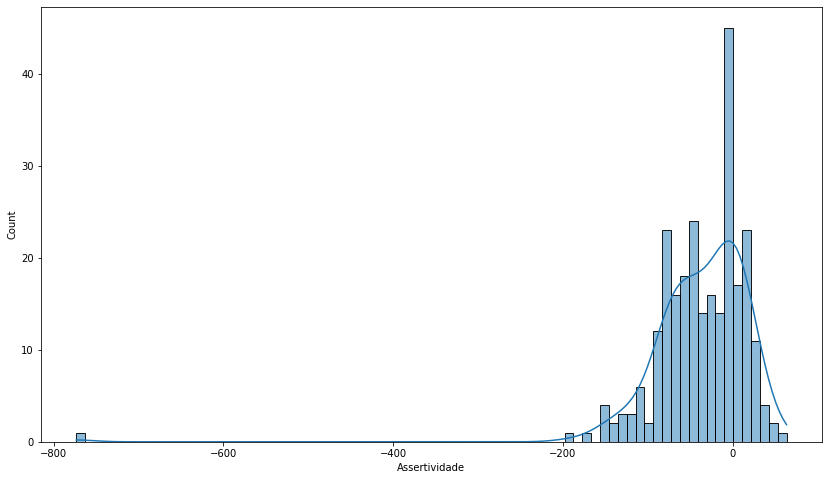

In [87]:
fig=plt.figure(figsize=[14,8])
sns.histplot(base2['Assertividade'],bins=80,kde=True)
plt.show()

In [88]:
# base2.query('Assertividade<-100')

In [89]:
dfbusca = dfTeste.copy()

In [90]:
dfbusca['chave2'].unique()

array(['2022-08-04CZKUOM21', '2022-08-30HOAXMU15', '2022-08-22HWFXDY17',
       '2022-08-31TBMXTY9', '2022-08-14HHZXMU5', '2022-08-03EXKOWY17',
       '2022-08-11NZLGYG16', '2022-08-07EXKKND23', '2022-08-05XMUYHY17',
       '2022-08-27EXKIVX8', '2022-08-09TBMXMU19', '2022-08-21IZLEXK15',
       '2022-08-28XTIXTY20', '2022-08-03KKYEXK5', '2022-08-27TRTEXK5',
       '2022-08-18XMUEXK18', '2022-08-18TRTEXK19', '2022-08-19OWYEXK5',
       '2022-08-20XTYEXK2', '2022-08-03HWFXDY21', '2022-08-21YKHNLX12',
       '2022-08-05NTUEXK11', '2022-08-16XMUEXK8', '2022-08-13EXKKUY12',
       '2022-08-18ERCXMU19', '2022-08-31YVOHOA12', '2022-08-29XMUEXK15',
       '2022-08-30HWFKLZ8', '2022-08-18TMNXMU15', '2022-08-02XMUEXK7',
       '2022-08-16HQKEXK10', '2022-08-28HWFERC22', '2022-08-31XDYEXK9',
       '2022-08-29XTIEXK20', '2022-08-05XMUTIF21', '2022-08-27NZLHQO8',
       '2022-08-14XMUXUY8', '2022-08-10NVZEXK10', '2022-08-14EXKXZX17',
       '2022-08-08HOAIVX5', '2022-08-17XMUTEI15', '2022-08-23RNK

In [91]:
#Variavel Vazia para receber o resultado da Predição
basex=[]

#for para percorrer todas as linhas da base selecionada / Definição de Variaveis para Filtros
# for i in range(len(dfTeste)):#len(dfTeste)

dfbusca.index=dfbusca['chave2']  

# dd=dfbusca['chave2'].#.sample(1)
# dd=dd[0]

lin=dfbusca.loc['2022-08-24HHZXTS11']
a=lin['NDO']
b=lin['Dep_Date']
# c=lin['Segment']
c=lin['FlightID']
d=lin['Periodo']
e=lin['Ocupacao']
f=lin['Flts']
g=lin['chave2']
h=lin['Nest']
j=lin['Dest']
k=lin['faixa_horaria']
m=lin['Capture']
n=lin['DOW']


     # print(i)
subdf2=dforiglimpo2.loc[(dforiglimpo2['Dep_Date'].values==b) & (dforiglimpo2['FlightID']==c) & (dforiglimpo2['faixa_horaria']==k)&(dforiglimpo2['Nest']==h)&(dforiglimpo2['NDO']==0)&(dforiglimpo2['DOW']==n)]


     #Filtro de linhas que estejam na mesma caracteristica da linha selecionada anteriormente
subdf1=dforiglimpo2.loc[(dforiglimpo2['Dep_Date'].values<=b) & (dforiglimpo2['FlightID']==c) & (dforiglimpo2['faixa_horaria']==k)&(dforiglimpo2['Nest']==h)&(dforiglimpo2['Capture']<=m)&(dforiglimpo2['Finalizado']==1)&(dforiglimpo2['DOW']==n)]
      

subdfpred=dforiglimpo2.loc[(dforiglimpo2['chave2'].values==g)&(dforiglimpo2['Capture']<=m)&(dforiglimpo2['DOW']==n)]

subdf1=pd.concat([subdf1,subdfpred])

subdf1=subdf1.sort_values(by = ['Dep_Date','Capture']) 

subdf1=subdf1.tail(2500)


subdf1=subdf1['Ocupacao'].cumsum()


subdf1=subdf1.reset_index(drop=True)
subdf1=subdf1.reset_index()
subdf1=pd.DataFrame(subdf1)
subdf1=pd.merge(subdf1,dt_fake, on='index')
     # subdf1['data']=subdf1['data'].astype('datetime64')
subdf1.index=subdf1['data']
subdf1=subdf1.drop(columns=['index'])
# subdf1=subdf1.drop(columns=['data'])

# subdf1=subdf1.query('Ocupacao>-0.4')



In [92]:
subdf1=subdf1[['data','Ocupacao']]
subdf1=subdf1.rename(columns={'data':'ds','Ocupacao':'y'})

subdf1_treino=subdf1.head(int(len(subdf1)*1))
subdf1_teste = subdf1.tail(int(len(subdf1)*0.2)+int(a))

In [93]:
m1=Prophet(growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=1000,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)
        #seasonality_mode='multiplicative'
m1.fit(subdf1_treino)





21:40:51 - cmdstanpy - INFO - Chain [1] start processing
21:40:52 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
datas_predict=m1.make_future_dataframe(periods=a)#len(subdf1_teste)
predict=m1.predict(datas_predict)

In [95]:
len(datas_predict), len(subdf1),a

(1821, 1780, 42)

In [96]:
predict=predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
x=predict['ds']
y=predict['yhat']



<AxesSubplot:xlabel='data'>

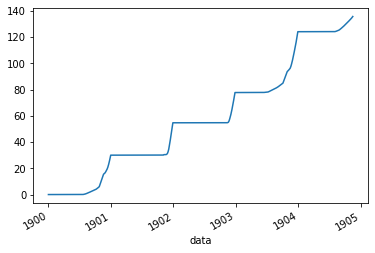

In [97]:
subdf1['y'].plot()

<AxesSubplot:>

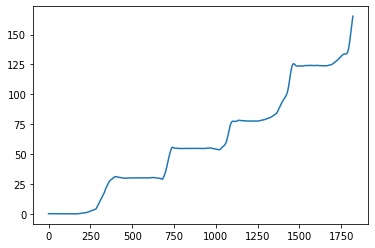

In [98]:

y.plot()

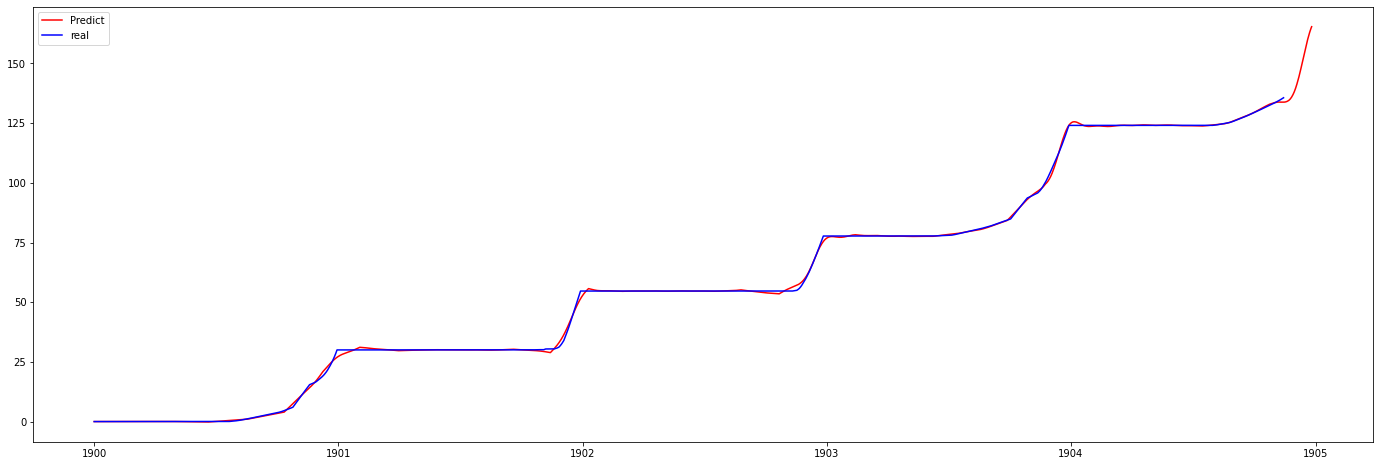

In [99]:
fig=plt.figure(figsize=[24,8])

plt.plot(x,y,color='red',label='Predict')
plt.plot(subdf1['ds'], subdf1['y'], color='blue', label='real')
plt.legend()
plt.show()

In [100]:
teste=dforiglimpo2[dforiglimpo2['NDO']==-1]
teste=teste[['chave2','Ocupacao']]
real=teste.loc[(teste['chave2']==g)]

t=pd.DataFrame(y)
v2=t.tail(1)
v=y.tail(2).head(1)
previsto=v2-v.values


In [101]:
a, real['Ocupacao'].values,previsto.values,len(subdf1_treino)

(42, array([0.83333333]), array([[0.72474591]]), 1780)

<AxesSubplot:>

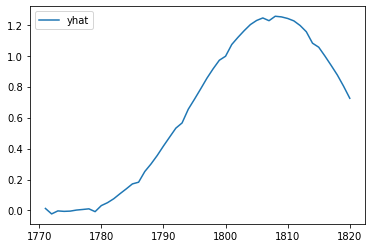

In [102]:
t=t.diff()
t=t.tail(50)
t.plot()


In [103]:
lin=dfTeste.loc[(dfTeste['chave2']=='2022-08-23HWFXMU10')]
# lin=dfTeste.iloc[1]
lin=lin.squeeze()
a=lin['NDO']
b=lin['Dep_Date']
# c=lin['Segment']
c=lin['FlightID']
d=lin['Periodo']
e=lin['Ocupacao']
f=lin['Flts']
g=lin['chave2']
h=lin['Nest']
j=lin['Dest']
k=lin['DOW']
m=lin['Capture']


subdf1=dforiglimpo2.loc[(dforiglimpo2['NDO']==a) & (dforiglimpo2['Dep_Date'].values<=b) & (dforiglimpo2['FlightID']==c) &
      (dforiglimpo2['Periodo']==d)&(dforiglimpo2['Nest']==h)&(dforiglimpo2['Capture']<=m)&(dforiglimpo2['Finalizado']==1)]#&(dforiginal2['DOW']==k)]

subdfpred=dforiglimpo2.loc[(dforiglimpo2['chave2'].values==g)&(dforiglimpo2['Capture']==m)]

     # subdf1=pd.concat([subdfpred,subdf1])

     #Filtro de linhas que tenham a mesma caracteristica da linha selecionada anteriormente, porem com NDO = Zero
subdf2=dforiglimpo2.loc[(dforiglimpo2['NDO']==-1) & (dforiglimpo2['Dep_Date'].values<b) & (dforiglimpo2['FlightID']==c) & (dforiglimpo2['Periodo']==d)&(dforiglimpo2['Nest']==h)]#&(dforiginal2['DOW']==k)]
y=subdf2[['chave2','Ocupacao']]

     #Merge das informações / contrução da Base de Treino

subdf3=pd.merge(subdf1,y,how='left',on='chave2')

subdf3=subdf3.drop(columns=['Flts', 'Rask','Dest','Capture'])
subdfpred = subdfpred.drop(columns=['Flts', 'Rask','Dest','Capture'])
subdfpred['Ocupacao_y']=0
subdfpred = subdfpred.set_index('chave2')

subdf3=subdf3.set_index('chave2')
subdf3=subdf3.sort_values(by ='Dep_Date')
subdf3.tail(50)


ValueError: Can only compare identically-labeled Series objects